# Business Problem
Major League Baseball general managers want to project the number of home runs a player will hit in future years. This will help them decide how much money they should pay these players if and when they become free agents or whether to target them in trades. Which peripheral batting statistics translate to home runs?

## Data
The data is taken from FanGraphs. It includes every player with a minimum of 100 plate appearances from 2015 through 2019. All players with at least 40 plate appearanes in 2020 were included since only 60 games were played (normal season is 162 games). All players with at least 50 plate appearances through July 11 are included for 2021. July 11 was the last day of games before the All-Star break. That's the theoretical first half of the 2021 season.
This gives us 3,123 observations and 46 variables.

## Target Variable
HR/PA, which was added through dividing home runs by plate appearances, might be the best target variable. We have players with 100 plate appearances and players with more than 700 plate appearances. In theory, someone with five home runs in 100 plate appearances is showing just as much home run ability as someone with 35 home runs in 700 PAs. So 'HR' would not be an accurate target variable.

Here's how the dataframe was put together:

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
list_of_dfs = []

In [107]:
#Concatentating seven dataframes to create a single one that encompasses 2015 through first half of 2021
for i in range(15, 22):
    new_df = pd.read_csv('FG_Stats_20' + str(i) + '.csv')
    list_of_dfs.append(new_df)                                 

In [108]:
FG_Stats = pd.concat(list_of_dfs, ignore_index = True)

In [109]:
FG_Stats.head()

,Name,Team,Age,AB,PA,HR,H,1B,2B,3B,...,Cent%,Oppo%,EV,LA,Barrels,Barrel%,maxEV,HardHit%,Events,playerid
0,Bryce Harper,WSN,22,521,654,42,172,91,38,1,...,33.8%,20.8%,91.4,14.7,48,12.2%,116.0,47.7%,394,11579
1,Joey Votto,CIN,31,545,695,29,171,107,33,2,...,36.9%,26.0%,90.1,11.4,39,9.5%,109.3,42.2%,412,4314
2,Corey Seager,LAD,21,98,113,4,33,20,8,1,...,45.6%,16.5%,90.4,9.2,6,7.6%,110.3,41.8%,79,13624
3,Paul Goldschmidt,ARI,27,567,695,33,182,109,38,2,...,40.2%,30.3%,92.0,12.9,52,12.3%,114.0,46.5%,424,9218
4,Mike Trout,LAA,23,575,682,41,172,93,32,6,...,33.2%,28.7%,92.9,14.0,68,16.1%,117.7,48.6%,422,10155


In [110]:
FG_Stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        3123 non-null   object 
 1   Team        3123 non-null   object 
 2   Age         3123 non-null   int64  
 3   AB          3123 non-null   int64  
 4   PA          3123 non-null   int64  
 5   HR          3123 non-null   int64  
 6   H           3123 non-null   int64  
 7   1B          3123 non-null   int64  
 8   2B          3123 non-null   int64  
 9   3B          3123 non-null   int64  
 10  BB%         3123 non-null   object 
 11  K%          3123 non-null   object 
 12  BB/K        3123 non-null   float64
 13  AVG         3123 non-null   float64
 14  SLG         3123 non-null   float64
 15  OBP         3123 non-null   float64
 16  ISO         3123 non-null   float64
 17  BABIP       3123 non-null   float64
 18  GB/FB       3123 non-null   float64
 19  LD%         3123 non-null  

In [111]:
FG_Stats.describe()

,Age,AB,PA,HR,H,1B,2B,3B,BB/K,AVG,...,OBP,ISO,BABIP,GB/FB,EV,LA,Barrels,maxEV,Events,playerid
count,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,...,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000
mean,28.174512,294.123919,328.810759,10.815882,75.582453,48.217739,15.062760,1.486071,0.408332,0.246686,...,0.317099,0.161839,0.294060,1.336324,88.223983,12.200128,14.352546,109.685110,227.486391,10756.603266
std,3.762568,167.210912,187.045897,9.534104,48.309048,31.605046,10.452904,1.912579,0.202497,0.040582,...,0.043976,0.064113,0.046886,0.549487,2.416949,4.807266,12.863309,3.446693,137.518586,5134.365519
min,19.000000,35.000000,40.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.073000,...,0.073000,0.000000,0.069000,0.300000,78.200000,-7.900000,0.000000,96.000000,20.000000,211.000000
25%,25.000000,151.000000,169.000000,4.000000,36.000000,23.000000,7.000000,0.000000,0.270000,0.223000,...,0.291000,0.117000,0.266000,0.960000,86.700000,9.000000,5.000000,107.400000,110.500000,6184.000000
50%,28.000000,257.000000,288.000000,8.000000,64.000000,40.000000,13.000000,1.000000,0.380000,0.250000,...,0.318000,0.159000,0.296000,1.230000,88.300000,12.300000,11.000000,109.600000,195.000000,11270.000000
75%,31.000000,429.000000,481.000000,16.000000,111.000000,70.000000,22.000000,2.000000,0.510000,0.273000,...,0.346000,0.203000,0.324000,1.570000,89.800000,15.400000,20.000000,112.000000,331.000000,14523.000000
max,43.000000,681.000000,747.000000,59.000000,216.000000,170.000000,58.000000,15.000000,2.670000,0.376000,...,0.490000,0.405000,0.516000,5.820000,96.200000,34.300000,84.000000,122.200000,599.000000,27506.000000


In [112]:
print(all(FG_Stats))

True


In [113]:
FG_Stats.transpose()

,0,1,2,3,4,5,6,7,8,9,...,3113,3114,3115,3116,3117,3118,3119,3120,3121,3122
Name,Bryce Harper,Joey Votto,Corey Seager,Paul Goldschmidt,Mike Trout,Miguel Cabrera,Mikie Mahtook,Franklin Gutierrez,Josh Donaldson,Ryan Raburn,...,Robel Garcia,Lane Thomas,Stevie Wilkerson,Edwin Rios,Ildemaro Vargas,Jarred Kelenic,Walker Buehler,Cristian Pache,Owen Miller,Leody Taveras
Team,WSN,CIN,LAD,ARI,LAA,DET,TBR,SEA,TOR,CLE,...,HOU,STL,BAL,LAD,- - -,SEA,LAD,ATL,CLE,TEX
Age,22,31,21,27,23,32,25,32,29,34,...,28,25,29,27,29,21,26,22,24,22
AB,521,545,98,567,575,429,105,171,620,173,...,88,48,72,51,51,103,42,63,47,46
PA,654,695,113,695,682,511,115,189,711,201,...,97,58,76,60,55,112,50,68,50,50
HR,42,29,4,33,41,18,9,15,41,8,...,1,0,0,1,0,2,0,1,0,0
H,172,171,33,182,172,145,31,50,184,52,...,13,5,12,4,7,11,6,7,5,4
1B,91,107,20,109,93,98,16,24,100,27,...,9,4,9,3,5,7,4,3,4,4
2B,38,33,8,38,32,28,5,11,41,16,...,3,1,3,0,2,2,2,3,1,0
3B,1,2,1,2,6,1,1,0,2,1,...,0,0,0,0,0,0,0,0,0,0





Filtering by one player and checking to see if his age is in proper sequence. 
This ensures that all the years are in order.

In [114]:
harper_check = FG_Stats[FG_Stats['Name'] == 'Bryce Harper']

In [115]:
print(harper_check)

              Name Team  Age   AB   PA  HR    H  1B  2B  3B  ...  Cent%  \
0     Bryce Harper  WSN   22  521  654  42  172  91  38   1  ...  33.8%   
550   Bryce Harper  WSN   23  506  627  24  123  73  24   2  ...  34.3%   
888   Bryce Harper  WSN   24  420  492  29  134  77  27   1  ...  35.2%   
1342  Bryce Harper  WSN   25  550  695  34  137  69  34   0  ...  29.5%   
1829  Bryce Harper  PHI   26  573  682  35  149  77  36   1  ...  37.8%   
2239  Bryce Harper  PHI   27  190  244  13   51  27   9   2  ...  34.0%   
2683  Bryce Harper  PHI   28  265  310  15   76  44  17   0  ...  34.4%   

      Oppo%    EV    LA  Barrels  Barrel%  maxEV  HardHit%  Events playerid  
0     20.8%  91.4  14.7       48    12.2%  116.0     47.7%     394    11579  
550   26.3%  88.9  14.9       29     7.3%  112.7     35.8%     399    11579  
888   29.3%  91.1  14.1       31     9.6%  116.3     42.6%     324    11579  
1342  28.2%  91.0  14.5       39    10.0%  115.1     44.9%     390    11579  
1829  24.

Adding 'HR/PA', or home runs per plate appearance, column, with four places after decimal.

In [116]:
FG_Stats['HR/PA'] = round(FG_Stats['HR']/FG_Stats['PA'], 4)

In [117]:
FG_Stats.head()

,Name,Team,Age,AB,PA,HR,H,1B,2B,3B,...,Oppo%,EV,LA,Barrels,Barrel%,maxEV,HardHit%,Events,playerid,HR/PA
0,Bryce Harper,WSN,22,521,654,42,172,91,38,1,...,20.8%,91.4,14.7,48,12.2%,116.0,47.7%,394,11579,0.0642
1,Joey Votto,CIN,31,545,695,29,171,107,33,2,...,26.0%,90.1,11.4,39,9.5%,109.3,42.2%,412,4314,0.0417
2,Corey Seager,LAD,21,98,113,4,33,20,8,1,...,16.5%,90.4,9.2,6,7.6%,110.3,41.8%,79,13624,0.0354
3,Paul Goldschmidt,ARI,27,567,695,33,182,109,38,2,...,30.3%,92.0,12.9,52,12.3%,114.0,46.5%,424,9218,0.0475
4,Mike Trout,LAA,23,575,682,41,172,93,32,6,...,28.7%,92.9,14.0,68,16.1%,117.7,48.6%,422,10155,0.0601


## Drop names and team?
We might be able to drop the names and team columns. We're trying to get an indication of what features contribute to certain power ratios. It doesn't matter, for example, that the numbers in an observation is Bryce Harper's 2015 season or JaCoby Jones' 2021 season. What matters is that these seasons resulted in .0642 and .0190 home runs per plate appearance, respectively.

In [118]:
FG_Stats.describe()

,Age,AB,PA,HR,H,1B,2B,3B,BB/K,AVG,...,ISO,BABIP,GB/FB,EV,LA,Barrels,maxEV,Events,playerid,HR/PA
count,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,...,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000
mean,28.174512,294.123919,328.810759,10.815882,75.582453,48.217739,15.062760,1.486071,0.408332,0.246686,...,0.161839,0.294060,1.336324,88.223983,12.200128,14.352546,109.685110,227.486391,10756.603266,0.030612
std,3.762568,167.210912,187.045897,9.534104,48.309048,31.605046,10.452904,1.912579,0.202497,0.040582,...,0.064113,0.046886,0.549487,2.416949,4.807266,12.863309,3.446693,137.518586,5134.365519,0.017815
min,19.000000,35.000000,40.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.073000,...,0.000000,0.069000,0.300000,78.200000,-7.900000,0.000000,96.000000,20.000000,211.000000,0.000000
25%,25.000000,151.000000,169.000000,4.000000,36.000000,23.000000,7.000000,0.000000,0.270000,0.223000,...,0.117000,0.266000,0.960000,86.700000,9.000000,5.000000,107.400000,110.500000,6184.000000,0.017500
50%,28.000000,257.000000,288.000000,8.000000,64.000000,40.000000,13.000000,1.000000,0.380000,0.250000,...,0.159000,0.296000,1.230000,88.300000,12.300000,11.000000,109.600000,195.000000,11270.000000,0.029200
75%,31.000000,429.000000,481.000000,16.000000,111.000000,70.000000,22.000000,2.000000,0.510000,0.273000,...,0.203000,0.324000,1.570000,89.800000,15.400000,20.000000,112.000000,331.000000,14523.000000,0.042150
max,43.000000,681.000000,747.000000,59.000000,216.000000,170.000000,58.000000,15.000000,2.670000,0.376000,...,0.405000,0.516000,5.820000,96.200000,34.300000,84.000000,122.200000,599.000000,27506.000000,0.111100


In [119]:
FG_Stats.transpose()

,0,1,2,3,4,5,6,7,8,9,...,3113,3114,3115,3116,3117,3118,3119,3120,3121,3122
Name,Bryce Harper,Joey Votto,Corey Seager,Paul Goldschmidt,Mike Trout,Miguel Cabrera,Mikie Mahtook,Franklin Gutierrez,Josh Donaldson,Ryan Raburn,...,Robel Garcia,Lane Thomas,Stevie Wilkerson,Edwin Rios,Ildemaro Vargas,Jarred Kelenic,Walker Buehler,Cristian Pache,Owen Miller,Leody Taveras
Team,WSN,CIN,LAD,ARI,LAA,DET,TBR,SEA,TOR,CLE,...,HOU,STL,BAL,LAD,- - -,SEA,LAD,ATL,CLE,TEX
Age,22,31,21,27,23,32,25,32,29,34,...,28,25,29,27,29,21,26,22,24,22
AB,521,545,98,567,575,429,105,171,620,173,...,88,48,72,51,51,103,42,63,47,46
PA,654,695,113,695,682,511,115,189,711,201,...,97,58,76,60,55,112,50,68,50,50
HR,42,29,4,33,41,18,9,15,41,8,...,1,0,0,1,0,2,0,1,0,0
H,172,171,33,182,172,145,31,50,184,52,...,13,5,12,4,7,11,6,7,5,4
1B,91,107,20,109,93,98,16,24,100,27,...,9,4,9,3,5,7,4,3,4,4
2B,38,33,8,38,32,28,5,11,41,16,...,3,1,3,0,2,2,2,3,1,0
3B,1,2,1,2,6,1,1,0,2,1,...,0,0,0,0,0,0,0,0,0,0


In [120]:
FG_Stats.tail()

,Name,Team,Age,AB,PA,HR,H,1B,2B,3B,...,Oppo%,EV,LA,Barrels,Barrel%,maxEV,HardHit%,Events,playerid,HR/PA
3118,Jarred Kelenic,SEA,21,103,112,2,11,7,2,0,...,22.1%,88.4,15.1,4,5.9%,109.3,39.7%,68,22558,0.0179
3119,Walker Buehler,LAD,26,42,50,0,6,4,2,0,...,52.0%,86.9,-3.8,0,0.0%,104.4,28.0%,25,19374,0.0000
3120,Cristian Pache,ATL,22,63,68,1,7,3,3,0,...,15.0%,81.7,8.0,2,5.0%,104.7,27.5%,40,19948,0.0147
3121,Owen Miller,CLE,24,47,50,0,5,4,1,0,...,30.4%,81.8,-0.7,0,0.0%,106.6,21.7%,23,24655,0.0000
3122,Leody Taveras,TEX,22,46,50,0,4,4,0,0,...,34.8%,88.9,-0.5,1,4.3%,109.5,34.8%,23,18900,0.0000


## Glossary and feature groupings

**Age:** A player's age that year. It's assumed home runs decline as age advances, but is there any particular age where there's a huge dropoff? Is there a range that's considered prime?<br>
**AB:** Official at-bats. This is different from plate appearances because a walk, for example, doesn't count as an at-bat whereas it does count as a plate appearance<br>
**PA:** Plate appearances. Number of times a player bats<br>
**HR:** Home runs<br>
**H:** Base hits, total of 1B, 2B, 3B and HR<br>
**1B:** Singles<br>
**2B:** Doubles<br>
**3B:** Triples<br>
**BB%:** Walks, aka bases on balls, divided by plate appearances<br>
**K%:** Strikeouts/plate appearances<br>
**BB/K:** Walks/strikeouts<br>
**AVG:** Batting average, H/AB<br>
**SLG:** Slugging pct Total bases/at-bats.<br>
**OBP:** On-base percentage<br>
**ISO:** Slugging minus BA. **This feature, as well as SLG, are directly affected by home runs. They will increase when an HR is hit.<br>
**BABIP:** Batting average on balls in play.<br>
**GB/FB:** Ground balls hit/fly balls hit<br>
**LD%:** line drives/balls in play<br>
**GB%:** ground balls/balls in play<br>
**FB%:** fly balls/balls in play<br>
**IFFB%:** infield fly balls/balls in play<br>
**HR/FB:** home runs/fly balls<br>
**IFH%:** Pct of base hits that are infield hits<br>

These features take a look at a player's plate discipline. How often do they swing the bat? Do they swing at pitches out of the strike zone?

**O-Swing%:** (Outside the Zone Swing Percentage) Swings at pitches outside the zone divided by pitches outside the zone.<br>
**Z-Swing%:** (Inside the Zone Swing Percentage) Swings at pitches inside the zone divided by pitches inside the zone.<br>
**Swing%:** (Swing Percentage) Swings divided by total pitches.<br>
**O-Contact%:** (Outside the Zone Contact Percentage) Contact made outside the zone divided by swings outside the zone.<br>
**Z-Contact%:** (Inside the Zone Contact Percentage) Contact made inside the zone divided by swings inside the zone.<br>
**Contact%:** (Contact Percentage) Contact made divided by swings.<br>
**Zone%:** (Zone Percentage): Pitches inside the zone divided by total pitches.<br>
**F-Strike%:** (First Pitch Strike Percentage) Percentage of PA that begin with a strike.<br>
**SwStr%:** (Swinging Strike Percentage) Swinging strikes divided by total pitches.<br>

These next three features look at **where** a player hits the ball. A right-handed hitter "pulls" by hitting to the left side of field and hits to the opposite field when he hits to the right side of the field. For lefties, the reverse is true.

**Pull%:** Pct of batted balls pulled<br>
**Center%:** Pct of batted balls hit to middle of field<br>
**Oppo%:** Pct of batted balls hit to opposite field<br>

These next seven features are the Statcast stats that MLB began tracking in 2015

**EV:** Exit Velocity, the speed of the batted ball<br>
**LA:** Launch angle, the angle at which the ball leaves the bat<br>
**Barrels:** A metric based on EV and LA. The "barrel zone" begins at an EV of 98 with an LA of 26-30. As the EV increases, the range of LA within the barrel zone increases.<br>
**Barrel%:** Barrels/batted-ball events<br>
**maxEV:** Highest exit velocity a player has reached<br>
**HardHit%:** EV > 95/batted-ball event<br>
**Events:** Batted-ball events<br>

Finally, playerid and our likely target variable, HR/PA, which is explained previously

In [121]:
missing = pd.concat([FG_Stats.isnull().sum(), 100 * FG_Stats.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Name,0,0.0
Pull%,0,0.0
O-Swing%,0,0.0
Z-Swing%,0,0.0
Swing%,0,0.0
O-Contact%,0,0.0
Z-Contact%,0,0.0
Contact%,0,0.0
Zone%,0,0.0
F-Strike%,0,0.0


## Checking data types
Now that we're sure there are no missing values, let's check variable types.<br>
It turns out there should only be two variables that are object types, Name and Team, but any numerical value with a percent sign after it is a string. These all need to be converted to floats.

In [122]:
FG_Stats.select_dtypes(include='object').T

,0,1,2,3,4,5,6,7,8,9,...,3113,3114,3115,3116,3117,3118,3119,3120,3121,3122
Name,Bryce Harper,Joey Votto,Corey Seager,Paul Goldschmidt,Mike Trout,Miguel Cabrera,Mikie Mahtook,Franklin Gutierrez,Josh Donaldson,Ryan Raburn,...,Robel Garcia,Lane Thomas,Stevie Wilkerson,Edwin Rios,Ildemaro Vargas,Jarred Kelenic,Walker Buehler,Cristian Pache,Owen Miller,Leody Taveras
Team,WSN,CIN,LAD,ARI,LAA,DET,TBR,SEA,TOR,CLE,...,HOU,STL,BAL,LAD,- - -,SEA,LAD,ATL,CLE,TEX
BB%,19.0%,20.6%,12.4%,17.0%,13.5%,15.1%,5.2%,7.4%,10.3%,11.4%,...,6.2%,17.2%,3.9%,11.7%,7.3%,7.1%,4.0%,2.9%,6.0%,6.0%
K%,20.0%,19.4%,16.8%,21.7%,23.2%,16.0%,27.0%,28.6%,18.7%,21.9%,...,38.1%,29.3%,39.5%,30.0%,23.6%,31.3%,46.0%,36.8%,48.0%,46.0%
LD%,22.2%,25.0%,20.3%,23.4%,24.4%,25.2%,23.3%,23.7%,17.3%,21.5%,...,15.4%,16.7%,23.8%,9.1%,15.8%,14.7%,5.6%,11.1%,17.4%,14.3%
GB%,38.5%,42.2%,53.2%,41.6%,37.2%,42.1%,32.9%,40.7%,44.8%,43.8%,...,46.2%,46.7%,57.1%,42.4%,60.5%,44.1%,66.7%,50.0%,65.2%,61.9%
FB%,39.3%,32.8%,26.6%,35.0%,38.4%,32.7%,43.8%,35.6%,37.9%,34.6%,...,38.5%,36.7%,19.0%,48.5%,23.7%,41.2%,27.8%,38.9%,17.4%,23.8%
IFFB%,5.8%,1.5%,0.0%,5.4%,2.5%,3.5%,6.3%,4.8%,9.6%,4.4%,...,5.0%,27.3%,12.5%,12.5%,22.2%,17.9%,0.0%,21.4%,25.0%,0.0%
HR/FB,27.3%,21.6%,19.0%,22.3%,25.3%,15.8%,28.1%,35.7%,21.8%,17.8%,...,5.0%,0.0%,0.0%,6.3%,0.0%,7.1%,0.0%,7.1%,0.0%,0.0%
IFH%,4.6%,1.7%,2.4%,6.3%,12.7%,2.0%,12.5%,4.2%,5.0%,3.5%,...,4.2%,7.1%,4.2%,7.1%,4.3%,0.0%,8.3%,11.1%,20.0%,15.4%


Breaking FG_Stats into FG_Stats_nums and FG_Stats_obj to work on the object data types.

In [123]:
FG_Stats_nums = FG_Stats.select_dtypes(include=['int64', 'float64'])

In [124]:
FG_Stats_nums.head()

,Age,AB,PA,HR,H,1B,2B,3B,BB/K,AVG,...,ISO,BABIP,GB/FB,EV,LA,Barrels,maxEV,Events,playerid,HR/PA
0,22,521,654,42,172,91,38,1,0.95,0.330,...,0.319,0.369,0.98,91.4,14.7,48,116.0,394,11579,0.0642
1,31,545,695,29,171,107,33,2,1.06,0.314,...,0.228,0.371,1.28,90.1,11.4,39,109.3,412,4314,0.0417
2,21,98,113,4,33,20,8,1,0.74,0.337,...,0.224,0.387,2.00,90.4,9.2,6,110.3,79,13624,0.0354
3,27,567,695,33,182,109,38,2,0.78,0.321,...,0.249,0.382,1.19,92.0,12.9,52,114.0,424,9218,0.0475
4,23,575,682,41,172,93,32,6,0.58,0.299,...,0.290,0.344,0.97,92.9,14.0,68,117.7,422,10155,0.0601


In [125]:
FG_Stats_obj = FG_Stats.select_dtypes(include='object')

In [126]:
FG_Stats_obj.head()

,Name,Team,BB%,K%,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,...,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,Pull%,Cent%,Oppo%,Barrel%,HardHit%
0,Bryce Harper,WSN,19.0%,20.0%,22.2%,38.5%,39.3%,5.8%,27.3%,4.6%,...,84.4%,75.4%,38.0%,54.6%,10.8%,45.4%,33.8%,20.8%,12.2%,47.7%
1,Joey Votto,CIN,20.6%,19.4%,25.0%,42.2%,32.8%,1.5%,21.6%,1.7%,...,82.5%,79.1%,42.4%,54.5%,7.6%,37.1%,36.9%,26.0%,9.5%,42.2%
2,Corey Seager,LAD,12.4%,16.8%,20.3%,53.2%,26.6%,0.0%,19.0%,2.4%,...,88.1%,78.0%,45.3%,62.8%,11.2%,38.0%,45.6%,16.5%,7.6%,41.8%
3,Paul Goldschmidt,ARI,17.0%,21.7%,23.4%,41.6%,35.0%,5.4%,22.3%,6.3%,...,82.5%,77.7%,43.4%,54.2%,8.5%,29.6%,40.2%,30.3%,12.3%,46.5%
4,Mike Trout,LAA,13.5%,23.2%,24.4%,37.2%,38.4%,2.5%,25.3%,12.7%,...,87.7%,80.0%,44.0%,56.7%,7.5%,38.2%,33.2%,28.7%,16.1%,48.6%


## Putting aside Name and Team columns
To make it easier to change FG_Stats_obj to numerical data types, we're dropping Name and Team columns and creating a names_and_team dataframe with player names and team names. We're storing it just in case we need it later.

In [127]:
names_and_teams = FG_Stats_obj.iloc[:,:2]

In [128]:
names_and_teams.head()

,Name,Team
0,Bryce Harper,WSN
1,Joey Votto,CIN
2,Corey Seager,LAD
3,Paul Goldschmidt,ARI
4,Mike Trout,LAA


## How we're changing objects to floats
We're creating a function to strip the % signs from the strings, then we're creating a list of FG_Stats_obj column names to use in another function that will change the stripped strings to numeric types.

In [131]:
FG_Stats_obj = FG_Stats_obj.drop(['Name', 'Team'], 1)

In [132]:
def remove_pct(rows, cols, df):
    for i in range(rows):
        for j in range(cols):
            df.iloc[i, j] = df.iloc[i, j].strip('%')

In [133]:
remove_pct(3123, 22, FG_Stats_obj)

In [134]:
FG_Stats_obj_cols = list(FG_Stats_obj.columns)

In [135]:
print(FG_Stats_obj_cols)

['BB%', 'K%', 'LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'IFH%', 'O-Swing%', 'Z-Swing%', 'Swing%', 'O-Contact%', 'Z-Contact%', 'Contact%', 'Zone%', 'F-Strike%', 'SwStr%', 'Pull%', 'Cent%', 'Oppo%', 'Barrel%', 'HardHit%']


In [136]:
FG_Stats_obj.head()

,BB%,K%,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,O-Swing%,Z-Swing%,...,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,Pull%,Cent%,Oppo%,Barrel%,HardHit%
0,19.0,20.0,22.2,38.5,39.3,5.8,27.3,4.6,27.6,72.5,...,84.4,75.4,38.0,54.6,10.8,45.4,33.8,20.8,12.2,47.7
1,20.6,19.4,25.0,42.2,32.8,1.5,21.6,1.7,19.1,62.0,...,82.5,79.1,42.4,54.5,7.6,37.1,36.9,26.0,9.5,42.2
2,12.4,16.8,20.3,53.2,26.6,0.0,19.0,2.4,29.3,77.2,...,88.1,78.0,45.3,62.8,11.2,38.0,45.6,16.5,7.6,41.8
3,17.0,21.7,23.4,41.6,35.0,5.4,22.3,6.3,22.4,61.6,...,82.5,77.7,43.4,54.2,8.5,29.6,40.2,30.3,12.3,46.5
4,13.5,23.2,24.4,37.2,38.4,2.5,25.3,12.7,24.4,55.6,...,87.7,80.0,44.0,56.7,7.5,38.2,33.2,28.7,16.1,48.6


In [137]:
FG_Stats_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   BB%         3123 non-null   object
 1   K%          3123 non-null   object
 2   LD%         3123 non-null   object
 3   GB%         3123 non-null   object
 4   FB%         3123 non-null   object
 5   IFFB%       3123 non-null   object
 6   HR/FB       3123 non-null   object
 7   IFH%        3123 non-null   object
 8   O-Swing%    3123 non-null   object
 9   Z-Swing%    3123 non-null   object
 10  Swing%      3123 non-null   object
 11  O-Contact%  3123 non-null   object
 12  Z-Contact%  3123 non-null   object
 13  Contact%    3123 non-null   object
 14  Zone%       3123 non-null   object
 15  F-Strike%   3123 non-null   object
 16  SwStr%      3123 non-null   object
 17  Pull%       3123 non-null   object
 18  Cent%       3123 non-null   object
 19  Oppo%       3123 non-null   object
 20  Barrel% 

In [138]:
#https://towardsdatascience.com/converting-data-to-a-numeric-type-in-pandas-db9415caab0b

In [139]:
def change_to_num(cols, df):
    for col in cols:
        df[col] = pd.to_numeric(df[col])   

In [140]:
change_to_num(FG_Stats_obj_cols, FG_Stats_obj)

In [141]:
FG_Stats_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BB%         3123 non-null   float64
 1   K%          3123 non-null   float64
 2   LD%         3123 non-null   float64
 3   GB%         3123 non-null   float64
 4   FB%         3123 non-null   float64
 5   IFFB%       3123 non-null   float64
 6   HR/FB       3123 non-null   float64
 7   IFH%        3123 non-null   float64
 8   O-Swing%    3123 non-null   float64
 9   Z-Swing%    3123 non-null   float64
 10  Swing%      3123 non-null   float64
 11  O-Contact%  3123 non-null   float64
 12  Z-Contact%  3123 non-null   float64
 13  Contact%    3123 non-null   float64
 14  Zone%       3123 non-null   float64
 15  F-Strike%   3123 non-null   float64
 16  SwStr%      3123 non-null   float64
 17  Pull%       3123 non-null   float64
 18  Cent%       3123 non-null   float64
 19  Oppo%       3123 non-null  

## Reuniting FG_Stats
Vertically concatenating FG_Stats_nums with FG_Stats_obj and storing it in FG_Stats

In [142]:
FG_Stats = pd.concat([FG_Stats_nums, FG_Stats_obj], axis=1)

In [143]:
FG_Stats.head()

,Age,AB,PA,HR,H,1B,2B,3B,BB/K,AVG,...,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,Pull%,Cent%,Oppo%,Barrel%,HardHit%
0,22,521,654,42,172,91,38,1,0.95,0.330,...,84.4,75.4,38.0,54.6,10.8,45.4,33.8,20.8,12.2,47.7
1,31,545,695,29,171,107,33,2,1.06,0.314,...,82.5,79.1,42.4,54.5,7.6,37.1,36.9,26.0,9.5,42.2
2,21,98,113,4,33,20,8,1,0.74,0.337,...,88.1,78.0,45.3,62.8,11.2,38.0,45.6,16.5,7.6,41.8
3,27,567,695,33,182,109,38,2,0.78,0.321,...,82.5,77.7,43.4,54.2,8.5,29.6,40.2,30.3,12.3,46.5
4,23,575,682,41,172,93,32,6,0.58,0.299,...,87.7,80.0,44.0,56.7,7.5,38.2,33.2,28.7,16.1,48.6


In [144]:
FG_Stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         3123 non-null   int64  
 1   AB          3123 non-null   int64  
 2   PA          3123 non-null   int64  
 3   HR          3123 non-null   int64  
 4   H           3123 non-null   int64  
 5   1B          3123 non-null   int64  
 6   2B          3123 non-null   int64  
 7   3B          3123 non-null   int64  
 8   BB/K        3123 non-null   float64
 9   AVG         3123 non-null   float64
 10  SLG         3123 non-null   float64
 11  OBP         3123 non-null   float64
 12  ISO         3123 non-null   float64
 13  BABIP       3123 non-null   float64
 14  GB/FB       3123 non-null   float64
 15  EV          3123 non-null   float64
 16  LA          3123 non-null   float64
 17  Barrels     3123 non-null   int64  
 18  maxEV       3123 non-null   float64
 19  Events      3123 non-null  

In [146]:
FG_Stats.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3123.0,28.174512,3.762568,19.000,25.0000,28.0000,31.00000,43.0000
AB,3123.0,294.123919,167.210912,35.000,151.0000,257.0000,429.00000,681.0000
PA,3123.0,328.810759,187.045897,40.000,169.0000,288.0000,481.00000,747.0000
HR,3123.0,10.815882,9.534104,0.000,4.0000,8.0000,16.00000,59.0000
H,3123.0,75.582453,48.309048,3.000,36.0000,64.0000,111.00000,216.0000
1B,3123.0,48.217739,31.605046,1.000,23.0000,40.0000,70.00000,170.0000
2B,3123.0,15.062760,10.452904,0.000,7.0000,13.0000,22.00000,58.0000
3B,3123.0,1.486071,1.912579,0.000,0.0000,1.0000,2.00000,15.0000
BB/K,3123.0,0.408332,0.202497,0.000,0.2700,0.3800,0.51000,2.6700
AVG,3123.0,0.246686,0.040582,0.073,0.2230,0.2500,0.27300,0.3760


## Visualizations
Histogram (11 rows by 4 cols) of each feature. HR is really right-tailed whereas HR/PA is more symmetrical. There's a closer look at those in the following cells. Finally, a scatterplot showing that most of the elite power hitters also have a high percentage of home runs per plate appearance. It looks like every player who's hit about 30 or more home runs in a season since 2015 also has HR/PA ratio above the mean.

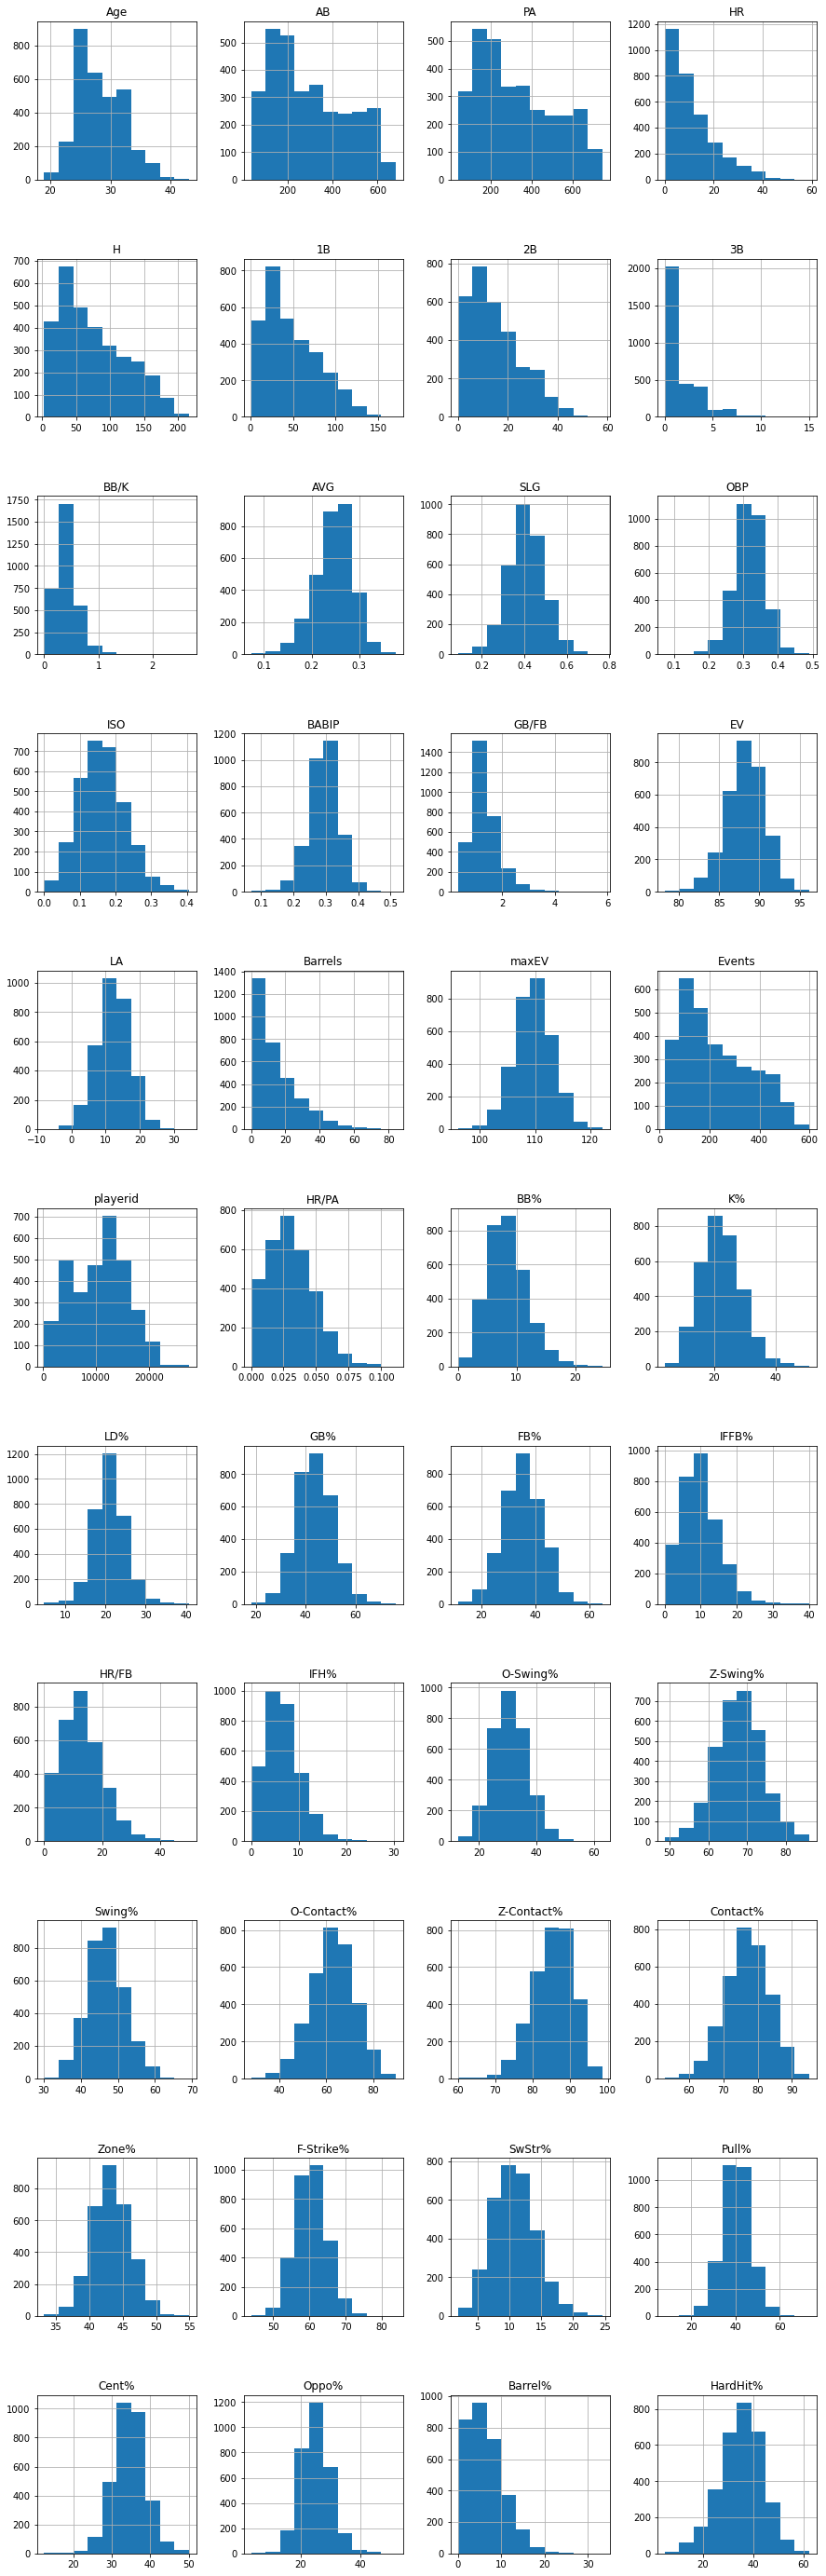

In [150]:
FG_Stats.hist(figsize = (15, 50), layout = (11, 4))
plt.subplots_adjust(hspace=0.5);

Text(0, 0.5, 'Count')

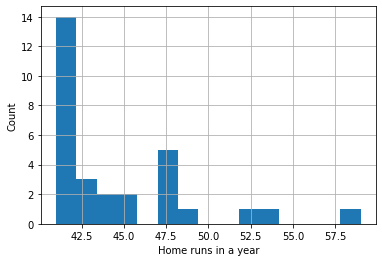

In [155]:
FG_Stats.HR[FG_Stats.HR > 40].hist(bins=15)
plt.xlabel("Home runs in a year")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

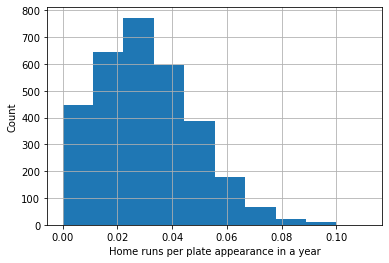

In [156]:
FG_Stats['HR/PA'].hist()
plt.xlabel("Home runs per plate appearance in a year")
plt.ylabel("Count")

<AxesSubplot:xlabel='HR/PA', ylabel='HR'>

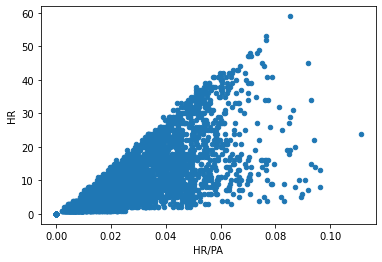

In [157]:
FG_Stats.plot(x='HR/PA', y='HR', kind='scatter')